In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 1. Normalize pixel values to range between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Convert class labels into one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Split dataset (already done; 50,000 for training, 10,000 for testing)
# CIFAR-10 is already split into 50,000 training and 10,000 test images.

# 4. Data augmentation (Optional)
datagen = ImageDataGenerator(
    rotation_range=15,    # Random rotations
    width_shift_range=0.1,  # Random horizontal shifts
    height_shift_range=0.1,  # Random vertical shifts
    horizontal_flip=True    # Random horizontal flips
)

# Fit the generator on the training data
datagen.fit(x_train)

# To use the augmented data for training:
# model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=..., validation_data=(x_test, y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential()

# Input layer: The input shape matches the 32x32x3 dimensions of CIFAR-10 images
model.add(layers.InputLayer(input_shape=(32, 32, 3)))

# 1st Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer

# 2nd Convolutional Layer: 64 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer

# 3rd Convolutional Layer: 128 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))  # Max pooling layer

# Flatten the output from convolutional layers
model.add(layers.Flatten())

# Fully Connected Layer (Dense layer): 512 neurons, ReLU activation
model.add(layers.Dense(512, activation='relu'))

# Output Layer: 10 output neurons for 10 classes with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,147,466 (4.38 MB)

 Trainable params: 1,147,466 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

## Question
Justify your choice of network architecture, including the number of  layers, types of layers, and the number of neurons/filters in each layer.

The input layer accepts images with shape (32, 32, 3) to match the CIFAR-10 image dimensions (32x32 pixels with 3 color channels).

Number of Filters: Starting with 32 filters and increasing to 64 and then 128 allows the network to progressively learn more complex features, starting with edges and simple patterns in the first layers and moving to more abstract representations (like textures and object parts) in the deeper layers.
Kernel Size: The 3x3 kernel size is standard in image recognition tasks, providing a balance between capturing fine details and maintaining computational efficiency.
Activation (ReLU): The ReLU activation function helps introduce non-linearity, which allows the network to model complex patterns while being computationally efficient.
MaxPooling: The pooling layers reduce the spatial dimensions of the image (by 2x2), thus reducing the number of parameters and helping to prevent overfitting, while retaining important features.

512 Neurons: A fully connected layer with 512 neurons provides a large capacity for learning complex representations of the image data. This size is a trade-off between model complexity and performance.


# Activation Function

## ReLU (Rectified Linear Unit):
Formula:
f(x)=max(0,x)
Why ReLU?:

Simplicity: The ReLU function is computationally simple and efficient as it only outputs zero or the input value.
Non-Linearity: It introduces non-linearity into the model, which is essential for capturing complex patterns and representations in the data.
Avoiding Vanishing Gradients: Unlike the sigmoid and tanh functions, which can lead to the "vanishing gradient" problem (where gradients become very small in backpropagation), ReLU helps avoid this by keeping gradients large when the input is positive. This leads to faster training and better convergence.
Sparse Activation: ReLU introduces sparsity into the network (many neurons output 0 for negative inputs), making the model more computationally efficient and helping reduce the likelihood of overfitting.

### Role during Backpropagation
During backpropagation, ReLU allows gradients to pass through for positive inputs (where the derivative is 1) but stops the gradient flow for negative inputs (derivative is 0). This selective gradient propagation helps the model converge faster since it avoids the problem of small gradients for large inputs.


## Tanh (Hyperbolic Tangent):
Why Tanh?:

Centered Output: The tanh function outputs values in the range [-1, 1], making it "centered" around zero. This property helps in balancing the data, ensuring that the outputs of the neurons have both positive and negative values. This can lead to faster convergence during backpropagation.
Non-Linearity: Like ReLU, tanh is also a non-linear function, which allows the network to learn more complex patterns.
Better for Symmetry: Since tanh outputs both negative and positive values, it can help in reducing biases in networks where centered values are needed.

### Role in Backpropagation:
This derivative is small for extreme values of x, meaning that tanh can suffer from the vanishing gradient problem, but it works well in practice for many applications, especially in deeper layers. The gradient flows effectively for moderate input values (around 0), which helps with effective learning.

In [4]:
# Compile the model with Adam and Categorical Cross Entropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9593 - loss: 0.1162 - val_accuracy: 0.7513 - val_loss: 1.2401
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9702 - loss: 0.0870 - val_accuracy: 0.7544 - val_loss: 1.2726
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.0798 - val_accuracy: 0.7524 - val_loss: 1.3138
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9764 - loss: 0.0681 - val_accuracy: 0.7557 - val_loss: 1.3385
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9805 - loss: 0.0583 - val_accuracy: 0.7450 - val_loss: 1.4436
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9732 - loss: 0.0778 - val_accuracy: 0.7521 - val_loss: 1.5030
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9793 - loss: 0.0627 - val_accuracy: 0.7408 - val_loss: 1.5252
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9817 - loss: 0.0541 - val_accuracy: 

# Why Choose Adam (Adaptive Moment Estimation):
Adam is one of the most popular optimizers for deep learning due to its adaptive learning rates and efficient handling of sparse gradients. It combines the benefits of both Momentum and RMSProp, which helps in faster convergence.

## How Adam Works:

Adam maintains a separate learning rate for each parameter, adjusting the learning rate dynamically for each one based on first-order moments (mean) and second-order moments (variance).
It is well-suited for large datasets and problems with noisy gradients (like CIFAR-10).

The choice of optimizer and learning rate directly affects the speed and stability of the network's convergence. Optimizers like Adam adapt the learning rate during training, making them more efficient and robust in handling complex problems. A learning rate that's too high can cause the model to overshoot minima and fail to converge, while a rate that's too low results in slow learning. If the model isn't converging, reducing the learning rate can help by allowing the model to make more precise updates to the weights, leading to smoother convergence. Gradual learning rate decay is often used to fine-tune this process.

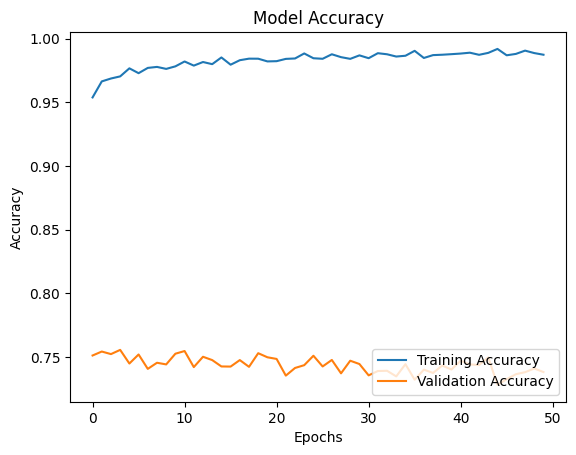

In [7]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Optionally, you can plot the training and validation accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


## Back Propagation
Backpropagation updates the weights in each layer by calculating the gradient of the loss function with respect to each weight. It starts by computing the error at the output layer, then propagates this error backward through the network, layer by layer, using the chain rule of calculus to find how much each weight contributed to the error. This process generates the gradients (partial derivatives), which indicate the direction and magnitude of change needed for each weight to reduce the overall loss.

## Learning Rate
The learning rate controls how much the weights are adjusted based on these gradients. A larger learning rate makes bigger changes to the weights in each update, which can speed up learning but risks overshooting the optimal point. A smaller learning rate makes smaller, more precise updates, reducing the chance of overshooting but potentially slowing down convergence. The learning rate thus plays a crucial role in balancing speed and stability during the training process.

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Get predictions for the test set
y_pred = model.predict(x_test)

# Convert predictions and true labels from one-hot encoded to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, F1-score, and the confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7454 - loss: 3.5249
Test Accuracy: 0.748199999332428
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.85      0.86      0.85      1000
           2       0.66      0.65      0.65      1000
           3       0.58      0.52      0.55      1000
           4       0.68      0.73      0.71      1000
           5       0.64      0.65      0.65      1000
           6       0.81      0.80      0.80      1000
           7       0.77      0.80      0.78      1000
           8       0.84      0.87      0.85      1000
           9       0.85      0.80      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

Confusion Matrix:
[[795  12  52  11  32  12   9  14  50  13]
 [ 11 85

# Question:
### How can you further improve model performance if the accuracy is low?
To improve model performance if the accuracy is unsatisfactory, several strategies can be employed, including data augmentation techniques that introduce variability by applying transformations such as flips, rotations, and shifts to the training images, which helps the model generalize better. Implementing regularization methods like dropout can prevent overfitting by randomly disabling neurons during training, while increasing model complexity through deeper architectures or more neurons can enhance feature extraction capabilities. Additionally, hyperparameter tuning, such as adjusting the learning rate or batch size, along with training for more epochs, can lead to better convergence. Finally, leveraging transfer learning by fine-tuning pre-trained models on similar datasets can significantly enhance performance by utilizing learned features from larger datasets.

# Optimization strategies

## Early Stopping:
 This technique monitors validation performance during training, halting the process when validation loss increases or accuracy plateaus, preventing overfitting and saving computational resources.

## Learning Rate Scheduling:
 This approach adjusts the learning rate throughout training, starting high for larger weight updates and decreasing it later for finer adjustments. This facilitates smoother convergence and reduces the risk of overshooting the optimal solution.

## Weight Initialization Techniques:
 Proper initialization, such as Xavier or He initialization, sets initial weights based on input and output units, maintaining healthy activation variance and preventing vanishing or exploding gradients. Effective weight initialization accelerates convergence and enhances learning.

Implementing these strategies can lead to m

# Challenges faced

### Overfitting:
Initially, the model showed signs of overfitting with high training accuracy but poor validation performance.
Implemented early stopping and dropout layers to reduce overfitting.

### Learning Rate Tuning:
The initial learning rate resulted in unstable training.
Solution: Adjusted the learning rate and employed learning rate scheduling to stabilize convergence.

### Class Imbalance:
Some classes had fewer samples than others.
Solution: Used data augmentation techniques to create synthetic samples, thus balancing the dataset.